In [1]:
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import pandas as pd
import h5py

# Redes neuronales teoría
La idea detras de las redes neuronales es la siguiente, sea L la capa L-esíma de la red neuronal, en aquella capa existen $n^{L}$ neuronas, a cada una de las neuronas podemos aplicar cierto modelo de clasificación dada una densidad de probabilidad basandose en un modelo lineal indicado por unos parametros $\Theta$, entonces $\vec{Z}_{i}^{L(m)} = \Theta_{i}^{L(m)} \vec{X}$. 
Esto es, en el caso particular de una regresión logisitca, nuestra densidad de probabilidad para la clasificación es:

\begin{equation}
f(z) = \frac{1}{1+e^{-z}}
\end{equation}

Ahora, para construir la red neuronal tomamos la primera capa, la cual tiene como funcionalidad recibir los datos de entranimiento, en nuestro caso vamos a considerar tres caracteristicas. Notese que $\vec{A}^{L}$ representa la salidad de la L-esíma capa

\begin{equation}
(x_{1}^{0(0)},x_{2}^{0(0)},x_{3}^{0(0)}) = \vec{A}^{0}=(a_{1}^{0(0)},a_{2}^{0(0)},a_{3}^{0(0)})
\end{equation}

Está salida está representando entonces lo que sería las respectivas caracteristicas considerada del objeto en cuestión para esa capa de aprendizaje. Luego, para la primera capa, lo que vamos a realizar es tomar la salida de la anterior capa, y a cada una de las neuronas asignar unos parametros $\Theta_{i}^{L(0)}$, es decir, a la i-esíma neurona de la capa L-esima se le asigna el modelo lineal (en nuestro caso particular tenemos 4 neuronas en la primera capa):

\begin{equation}
Z_{1}^{1(0)} = b_{1} + a_{1}\theta_{1,1}+a_{2}\theta_{1,2}+a_{3}\theta_{1,3}
\end{equation}

\begin{equation}
Z_{2}^{1(0)} = b_{2} + a_{1}\theta_{2,1}+a_{2}\theta_{2,2}+a_{3}\theta_{2,3}
\end{equation}

\begin{equation}
Z_{3}^{1(0)} = b_{3} + a_{1}\theta_{3,1}+a_{2}\theta_{3,2}+a_{3}\theta_{3,3}
\end{equation}

\begin{equation}
Z_{4}^{1(0)} = b_{4} + a_{1}\theta_{4,1}+a_{2}\theta_{4,2}+a_{3}\theta_{4,3}
\end{equation}

Lo anterior se puede escribir matricialmente como sigue:

\begin{equation}
\begin{bmatrix}
Z_{1}^{1(0)}\\
Z_{2}^{1(0)}\\
Z_{3}^{1(0)}\\
Z_{4}^{1(0)}
\end{bmatrix}
=
\begin{bmatrix}
b_{1}^{1(0)}\\
b_{2}^{1(0)}\\
b_{3}^{1(0)}\\
b_{4}^{1(0)}
\end{bmatrix}
+
\begin{bmatrix}
\theta_{1,1}^{1(0)}&\theta_{1,2}^{1(0)}&\theta_{1,3}^{1(0)}\\
\theta_{2,1}^{1(0)}&\theta_{2,2}^{1(0)}&\theta_{2,3}^{1(0)}\\
\theta_{3,1}^{1(0)}&\theta_{3,2}^{1(0)}&\theta_{3,3}^{1(0)}\\
\theta_{4,1}^{1(0)}&\theta_{4,2}^{1(0)}&\theta_{4,3}^{1(0)}
\end{bmatrix}_{4\times 3}
\begin{bmatrix}
a_{1}^{1(0)}\\
a_{2}^{1(0)}\\
a_{3}^{1(0)}
\end{bmatrix}
\end{equation}
O, de forma equivalente como $\vec{Z^{1(0)}} = \vec{b}+\Theta\vec{A^{0(0)}}$. Con este valor obtenido podemos calcular lás respectivas probabilidades para cada $Z_{i}^{1(0)}$ como sigue: $P(\vec{Z}=\vec{z^{1(0)}})=f(\vec{b}^{1(0)}+\Theta\vec{A^{0(0)}})=\vec{A^{1(0)}}$, lo cual nos permitirá concluir acerca de la clasificación para la primera capa. 

Para los valores obtenidos de $\vec{A^{1(0)}}$ podemos determinar la salida de la siguiente capa, por un sistema de ecuaciones similar(nuevamente con 4 neuronas).

\begin{equation}
\begin{bmatrix}
Z_{1}^{2(0)}\\
Z_{2}^{2(0)}\\
Z_{3}^{2(0)}\\
Z_{4}^{2(0)}
\end{bmatrix}
=
\begin{bmatrix}
b_{1}^{2(0)}\\
b_{2}^{2(0)}\\
b_{3}^{2(0)}\\
b_{4}^{2(0)}
\end{bmatrix}
+
\begin{bmatrix}
\theta_{1,1}^{2(0)}&\theta_{1,2}^{2(0)}&\theta_{1,3}^{2(0)}&\theta_{1,4}^{2(0)}\\
\theta_{2,1}^{2(0)}&\theta_{2,2}^{2(0)}&\theta_{2,3}^{2(0)}&\theta_{2,4}^{2(0)}\\
\theta_{3,1}^{2(0)}&\theta_{3,2}^{2(0)}&\theta_{3,3}^{2(0)}&\theta_{3,4}^{2(0)}\\
\theta_{4,1}^{2(0)}&\theta_{4,2}^{2(0)}&\theta_{4,3}^{2(0)}&\theta_{4,4}^{2(0)}
\end{bmatrix}_{4\times 3}
\begin{bmatrix}
a_{1}^{2}\\
a_{2}^{2}\\
a_{3}^{2}\\
a_{4}^{2}
\end{bmatrix}
\end{equation}

De donde la salida de la segunda capa viene dada por: $\vec{A}^{2(0)}=f(\vec{b}^{2(0)}+\Theta^{2(0)}\vec{A}^{1(0)})$. Repitiendo este procedimiento para el m-esímo entranmiento, podemos escribir que la salida de la capa L-esíma con $n^{L}$ neuronas sería:

\begin{equation}
\begin{bmatrix}
Z_{1}^{L(m)}\\
Z_{2}^{L(m)}\\
.\\
.\\
.\\
Z_{n^{L}}^{L(m)}
\end{bmatrix}
=
\begin{bmatrix}
b_{1}^{L(m)}\\
b_{2}^{L(m)}\\
.\\
.\\
.\\
b_{n^{L}}^{L(m)}
\end{bmatrix}
+
\begin{bmatrix}
\theta_{1,1}^{L(m)}&\theta_{1,2}^{L(m)}&.&.&.&\theta_{1,n^{L-1}}\\
\theta_{2,1}^{L(m)}&\theta_{2,2}^{L(m)}&.&.&.&\theta_{2,n^{L-1}}\\
.\\
.\\
.\\
\theta_{n^{L},1}^{L(m)}&\theta_{n^{L},2}^{L(m)}&.&.&.&\theta_{n^{L},n^{L-1}}
\end{bmatrix}_{n^{L}\times n^{L-1}}
\begin{bmatrix}
a_{1}^{L(m)}\\
a_{2}^{L(m)}\\
.\\
.\\
.\\
a_{n^{L-1}}^{L(m)}
\end{bmatrix}
\end{equation}
Donde la salida sería $\vec{A}^{L(m)}=f(\Theta^{L(m)}\vec{A}^{L-1(m)}+\vec{b}^{L(m)})$. 
Finalmente veamos la aplicación del metodo del gradiente descendiente para cada una de las capas en cada entramiento, para ello considere la siguiente formula:

\begin{equation}
\Theta_{n+1}^{L(m)}=\Theta_{n}^{L(m)}-\alpha \vec{\triangledown }  J
\end{equation}
Donde $\alpha$ corresponde a la taza de aprendizaje. En este caso, al igual que en la regresión logistica estudiada anteriormente aquella función de coste proviene de la probabilidad de maximizar la probabilidad de encontrarse en una categoría u otra, esto es:

\begin{equation}
J([\Theta^{L(m)}]_{j}) = \frac{1}{m}\sum_{i=1}^{m}\cal L^{(i)}(Y_{j}^{i},A^{L(i)}) = \frac{1}{m}\sum_{i=1}^{m}[Y_{j}^{i}log(A_{j}^{L(i)})-(1-Y_{j}^{i})log(1-{A}_{j}^{L(i)})]
\end{equation}

**Nota:** Se coloca el super indica j, indicando que estamos tomando la j-esíma fila de la matriz $\Theta^{L(m)}$. Notese además que la suma del indice i es respecto a los m entrenamientos.
Ha de notarse también que $[\Theta^{L(m)}]_{j} = [\theta_{j,1},\theta_{j,2},...,\theta_{j,n^{[L-1]}}]$. 


Para obtener el gradiente de la función de coste, vamos a realizarlo mediante derivadas parciales:

\begin{equation}
d[\Theta^{L(m)}]_{j} = \frac{\partial J }{\partial \theta_{j,k}} = \frac{1}{m}\sum_{i=1}^{m}\frac{\partial\cal L}{\partial \cal A^{L(i)}}\frac{\partial A^{L(i)}}{\partial Z_{j}^{i(L)}}\frac{\partial Z_{j}^{i(L)}}{\partial \theta_{j,k}}
\end{equation}

De forma analoga la podemos definir aquella diferencia respecto al parametro $b$ que corresponde al bias de la red neuronal. 

\begin{equation}
db^{[L]} = \frac{1}{m}\sum_{i=1}^{m}\frac{\partial\cal L}{\partial \cal A^{L(i)}}\frac{\partial A^{L(i)}}{\partial Z_{j}^{i(L)}}\frac{\partial Z_{j}^{i(L)}}{\partial b}
\end{equation}

Veamos el calculo de cada una de las derivadas parciales.

\begin{equation}
dA^{(i)[L]} = \frac{\partial \cal L}{\partial A^{[L](i)}} = \frac{Y^{(i)}}{A^{(i)[L]}} + \frac{1-Y^{(i)}}{1-A^{(i)[L]}}
\end{equation}

Ahora, empleando la regla de la cadena para $A^{(i)[L]} = f(Z^{(i)[L]})$, siendo $f$ la función definida anteriormente, tendriamos que:

\begin{equation}
\cal \frac{\partial A^{(i)[L]}}{\partial Z^{(i)[L]}} = \frac{\partial f}{\partial z} = f(z)(1-f(z))=A(Z^{(i)[L]})(1-A(Z^{(i)[L]})) = f'(Z^{(i)[L]})
\end{equation}

Finalmente tendriamos que:

\begin{equation}
\cal \frac{\partial Z^{(i)[L]}}{\partial \theta_{j,k}} = \sum_{i=1}^{m} \frac{\partial \theta_{j,i}}{\partial \theta_{j,k} }a_{i}^{[L-1]} = \sum_{i=1}^{m}\delta_{i,k}a_{i}^{[L-1]}=a_{k}^{[L-1]}
\end{equation}

\begin{equation}
\frac{\partial Z^{(i)[L]}}{\partial b} = \vec{1}
\end{equation}

Con estos resultados podemos obtener el argumento de la sumatoria que me permitirá aplicar el metodo gradiente, esto es: 

\begin{equation}
d\Theta^{(i)[L]} = dA^{(i)[L]}A(Z^{(i)[L]})(1-A(Z^{(i)[L]}))A^{(i)[L-1]}
\end{equation}

Por simplicidad se redefine la anterior ecuación con $\cal dZ^{(i)[L]} = dA^{(i)[L]}f'(Z^{i[L]})$. Se obtiene:

\begin{equation}
d\Theta^{(i)[L]} = \cal dZ^{(i)[L]}A^{(i)[L-1]}
\end{equation}

\begin{equation}
db^{(i)[L]} = \cal dZ^{(i)[L]} 
\end{equation}

Aquí veamos unas ultimas definiciónes pertienentes: 

\begin{equation*} 
dZ^{[l]} = dA * f'^{[l]} (Z^{[l]})
\end{equation*}

\begin{equation*} 
d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} 
\end{equation*}

\begin{equation*}
db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}
\end{equation*}

\begin{equation*}
dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \Theta^{[l] T} dZ^{[l]}
\end{equation*}



# Algoritmo General

1. Creación de la arquitectura de la red neuronal.
2. Inicialización de parámetros
3. Aplicar el forward pass para toda la red


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

4. Calcular la funcion de coste


$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$


5. Aplicar el Backwardpass
\begin{equation}
dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]})
\end{equation}

$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} $

6. Calcular el gradiente descendente, actualizar parametros W.


$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $
$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $

7. Repetir desde el paso 3, terminar cuando J no

# Topología de la red
1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.

In [2]:
# Lectura de los datos

data_train= "C:\\Users\\tomig\\OneDrive\\Desktop\\UDEA\\SEPTIMO SEMESTRE\\APRENDIZAJE ESTADISTICO\\train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "C:\\Users\\tomig\\OneDrive\\Desktop\\UDEA\\SEPTIMO SEMESTRE\\APRENDIZAJE ESTADISTICO\\test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r") #  Esto son diccionarios 

## Datos de entramiento 

x_train,y_train = train_dataset["train_set_x"], train_dataset["train_set_y"]

## Datos de prueba 
x_test, y_test = test_dataset["test_set_x"], test_dataset["test_set_y"]


**Nota**
Estos archivos los estoy leyendo desde mi computador, para que el codigo corra se debe volver a subir

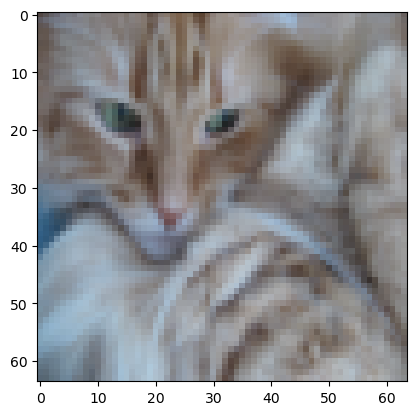

In [3]:
# Visualización de los datos

plt.imshow(x_train[2])

Lo que se busca determinar de todas estas imagenes cuales corresponden a imagenes de gatos y cuales no. Cuando es una imagen de gato se clasifica como una clase 1, cuando no es un gato se tiene la clasificación como una clase 0.

In [4]:
# Normalizando todos los datos respecto a los colores
## aplanando todos los colores
x_train_ = np.reshape(x_train, (209, 64* 64 * 3 )) / 255
x_test_ = np.reshape(x_test, (50, 64* 64 * 3 )) / 255

In [5]:
# Primera aproximación a una red neuoronal  

m , nx = np.shape(x_train_)

A0 = x_train_.T ## Va a recibir los 209 ejemplos de entrenamiento

## Definición de la topología de la red neuronal 

topology = [nx,10,2,23,20,1] # La ultima siempre debe ser 1.

# Definición de la función de activación 

def func_activation(name,x):
    if name == "sigmoid":
        f = lambda x : 1/(1+np.exp(-x))
        fp = f(x)* ( 1 - f(x))
        return f(x),fp
    elif name == "tanh":
        return np.tanh(x)
    elif name == "relu":
        return np.maximum(0,x)
    elif name == "softmax":
        exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
        return exp_x / np.sum(exp_x, axis=0, keepdims=True)
    else:
        raise ValueError("Función de activación no reconocida")

## función de activacion en cada capa 

func_name = ["sigmoid","sigmoid","sigmoid","sigmoid","sigmoid","sigmoid"]


In [6]:
# Inicialización de la red

class layer_nn:
    def __init__(self,act_func,n_ = None ,n = None):
        # n_ stands for the number of neurons in the previous layer
        # n stands for the number of neurons in the current layer
        theta = 2 * np.random.random((n,n_)) - 1 
        b = 2 * np.random.random((n,1)) - 1
        self.b = b
        self.theta = theta
        self.name = act_func
    
    def output(self,A_):
        Arg = self.b + self.theta @ A_
        Z = func_activation(self.name,Arg)
        self.A = Z[0]
        self.Ap = Z[1] 
    
    def output_(self,Z,A,Ap):
        self.Z = Z
        self.A1 = A
        self.Ap1 = Ap
    
    def derivatives(self,dtheta,db):
        self.dtheta = dtheta
        self.db = db
    


In [7]:
red = []
red.append(layer_nn(func_name[0],0,0))
red[0].output_(0,A0,0) # Capa de entrada # Salida de la capa de entrada
for i in range(1, len(topology)): # Nothing is done with the first layer
    red.append(layer_nn(func_name[i],topology[i-1],topology[i]))

In [8]:
out1 = layer_nn.output(red[1],red[0].A1) # Salida de la primera capa
out2 = layer_nn.output(red[2],red[1].A) # Salida de la segunda capa
out3 = layer_nn.output(red[3],red[2].A) # Salida de la tercera capa
out4 = layer_nn.output(red[4],red[3].A) # Salida de la cuarta capa
out5 = layer_nn.output(red[5],red[4].A) # Salida de la quinta capa

In [9]:
# Calculos de la salida de la red neuronal: 

for i in range(1, len(red)):
    Z = red[i].b + red[i].theta @ A0
    A, Ap = func_activation(red[i].name,Z)
    A0 = A
    layer_nn.output_(red[i],Z,A,Ap)


In [84]:
## Actualización de la red neuronal 

def coste(Y,A):
    m = Y.shape[0]
    m_ = 1./m
    ji = Y * np.log(A) + (1-Y) * np.log(1-A) ## A de la i-esima capa
    return ji.sum()*m_

Y_train = np.reshape(y_train, (1,209)) # 209 ejemplos de entrenamiento

## Clasificación  para cada uno de los datos de entrenamiento

# función de coste para la ultima capa. 

Cost = coste(Y_train,red[3].A1)

print(Cost)
## siempre se empieza a optimizar desde la última capa. 


-3578.899812141329


In [57]:
# Calculo manual 
L = 5

dAL = -1 * ( np.divide(Y_train,red[5].A1) - np.divide(1-Y_train,1-red[5].A1) ) # Derivada de la función de coste respecto a la salida de la última capa

dZL = dAL * red[5].Ap 

m_ = 1./m

dtheta_L = m_ * dZL@red[4].A1.T

dbL = m_ * np.sum(dZL,axis=1,keepdims=True)

## Actualización de la última capa

red[5].dtheta = dtheta_L
red[5].db = dbL

alpha = 0.2 # Taza de aprendizaje


In [64]:
L = 4

dAL_4 = red[5].theta.T @ dZL

dZL_4 = dAL_4*red[4].Ap

dtheta_L_4 = m_ * dZL_4 @ red[3].A1.T

dbL_4 = m_ * np.sum(dZL_4,axis=1,keepdims=True)

## Actualización de la penúltima capa

red[4].dtheta = dtheta_L_4
red[4].db = dbL_4


In [68]:
L = 3

dAL_3 = red[4].theta.T@dZL_4

dZL_3 = dAL_3 * red[3].Ap

dtheta_L_3 = m_ * dZL_3 @ red[2].A1.T

dbL_3 = m_ * np.sum(dZL_3,axis=1,keepdims=True)


## Actualización de la antepenúltima capa

red[3].dtheta = dtheta_L_3
red[3].db = dbL_3

L = 2

dAL_2 = red[3].theta.T @ dZL_3
dZL_2 = dAL_2 * red[2].Ap
dtheta_L_2 = m_ * dZL_2 @ red[1].A1.T
dbL_2 = m_ * np.sum(dZL_2,axis=1,keepdims=True)
## Actualización de la cuarta capa
red[2].dtheta = dtheta_L_2
red[2].db = dbL_2
L = 1
dAL_1 = red[2].theta.T @ dZL_2
dZL_1 = dAL_1 * red[1].Ap
dtheta_L_1 = m_ * dZL_1 @ red[0].A1.T
dbL_1 = m_ * np.sum(dZL_1,axis=1,keepdims=True)
## Actualización de la tercera capa
red[1].dtheta = dtheta_L_1
red[1].db = dbL_1



In [24]:
## Aplicación del gradiente descedenete en cada capa. 

for i in range(1,len(red)):
    red[i].theta = red[i].theta -  alpha * red[i].dtheta
    red[i].b = red[i].b - alpha * red[i].db

In [85]:
## Generalización del anterior procedimiento. 

# Backward propagation

def backward_nn(red):
    dZ = []
    for i in range(-len(red)+1,0):
        if i == -len(red)+1:
            dAL = -1 * ( np.divide(Y_train,red[-i].A1) - np.divide(1-Y_train,1-red[-i].A1) )
            dZL = dAL * red[-i].Ap
            dZ.append(dZL)
            m_ = 1./m
            dthetaL = m_ * dZL @ red[-i-1].A1.T
            dbL = m_ * np.sum(dZL,axis=1,keepdims=True)
            red[-i].dtheta = dthetaL
            red[-i].db = dbL
        else:
            dAL = red[-1*(i-1)].theta.T @ dZ[-1]
            dZL = dAL * red[-i].Ap
            dZ.append(dZL)
            dthetaL = m_ * dZL @ red[-i-1].A1.T
            dbL = m_ * np.sum(dZL,axis=1,keepdims=True)
            red[-i].dtheta = dthetaL
            red[-i].db = dbL
    return red

def update_nn(red, alpha):
    for i in range(1,len(red)):
        red[i].theta = red[i].theta -  alpha * red[i].dtheta
        red[i].b = red[i].b - alpha * red[i].db
    
    return red
        


## Generalización del procedimiento anterior considerado la solución brindada por el profesor Hernan

In [184]:
m_x , n_x = np.shape(x_train_)

n_y = 1  # tamaño de la capa de salida

class Capa_NN:
    
    def __init__(self,act_func, nn_present, nn_before):
        # nn_present stands for the number of neurons in the current layer
        # nn_before stands for the number of neurons in the previous layer
        self.theta = 2 * np.random.random((nn_present,nn_before)) - 1 
        self.b = 2 * np.random.random((nn_present,1)) - 1
        self.name = act_func
    def output(self,Z,A,Ap):
        self.Z = Z
        self.A = A
        self.Ap = Ap
    
    def derivadas(self,dtheta,db):
        self.dtheta = dtheta
        self.db = db

## Funciones de activación 

@np.vectorize
def relu(x):
    if (x>=0):
        return x
    else :
        return 0

# Derivada de la función Relu
@np.vectorize
def reluP(x):
    if (x>=0):
        return 1
    else :
        return 0

# Función de activación Sigmoide


def sigmoid(x):
    return 1/(1+np.exp(-x))

## Funciones de activación: 

def act_func(x, Activation):
    if Activation  == "sigmoid":
        f1 = sigmoid(x)
        fp1 = f1* ( 1 - f1 )
        return f1,fp1
    elif Activation  == "tanh":
        return np.tanh(x)
    elif Activation == "relu":
        f = relu(x)
        fp = reluP(x)
        return f,fp

## Inicialización de la red neuronal 

def red_NN(topology,activation):

    """ Creación de la red neuronal con la topología y funciones de activación dadas. 
    Parametros: Topology: lista con la topología de la red neuronal.
    activation: lista con las funciones de activación de cada capa. 
    """
    nn = list()
    L = len(topology)
    for i in range(1,L):
        nn.append(Capa_NN(activation[i],topology[i],topology[i-1]))

    return nn

## Forward Pass: Configuración de los valores de capa en la red neuronal. 

def forward_pass(input, nn):
    """ Calcula la salida de la red neuronal para un input dado. 
    Parametros: nn: red neuronal.
    input: vector de entrada. 
    """
    A0 = input
    nn_update = []

    for layer in nn:
        # Salida de cada capa.
        Z = layer.b + layer.theta @ A0
        A, Ap = act_func(Z,layer.name)
        layer.output(Z,A,Ap)
        nn_update.append(layer)
        A0 = A  
    return A,nn_update

## Función de coste a optimizar: 

def cost_funct(A,Y):
    m = Y.shape[0]
    m_ = 1./m
    ji = Y * np.log(A) + (1-Y) * np.log(1-A) ## A de la i-esima capa
    return ji.sum()*m_

def backward_propagation(AL,Y,red):
    """ Esta función calcula el gradiente de la función de coste respecto a los parámetros de la red neuronal.
    Cuando a la red neuronal ya se le realizo el forward_pass"""
    dZ = []
    for i in range(-len(red)+1,0):
        if i == -len(red)+1:
            dAL = -1 * ( np.divide(Y,AL) - np.divide(1-Y,1-AL) )
            dZL = dAL * red[-i].Ap
            dZ.append(dZL)
            m_ = 1./np.shape(Y)[0]
            dthetaL = m_ * dZL @ red[-i-1].A.T
            dbL = m_ * np.sum(dZL,axis=1,keepdims=True)
            red[-i].dtheta = dthetaL
            red[-i].db = dbL
        else:
            dAL = red[-1*(i-1)].theta.T @ dZ[-1]
            dZL = dAL * red[-i].Ap
            dZ.append(dZL)
            dthetaL = m_ * dZL @ red[-i-1].A.T
            dbL = m_ * np.sum(dZL,axis=1,keepdims=True)
            red[-i].dtheta = dthetaL
            red[-i].db = dbL
    return red

def update_params(nn,alpha):
    """Alpha stands for the learning rate and nn is the neural network."""
    for i in range(1,len(nn)):
        nn[i].theta = nn[i].theta -  alpha * nn[i].dtheta
        nn[i].b = nn[i].b - alpha * nn[i].db
    
    return nn





In [185]:
# Lectura de los datos 

data_train= "C:\\Users\\tomig\\OneDrive\\Desktop\\UDEA\\SEPTIMO SEMESTRE\\APRENDIZAJE ESTADISTICO\\train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "C:\\Users\\tomig\\OneDrive\\Desktop\\UDEA\\SEPTIMO SEMESTRE\\APRENDIZAJE ESTADISTICO\\test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r") #  Esto son diccionarios

x_train_classes, x_train, train_label = train_dataset["list_classes"], train_dataset["train_set_x"], train_dataset["train_set_y"]

x_test_classes, x_test, test_label = test_dataset["list_classes"], test_dataset["test_set_x"], test_dataset["test_set_y"]

x_train_ = np.reshape(x_train, (209, 64* 64 * 3 )) / 255
x_test_ = np.reshape(x_test, (50, 64* 64 * 3 )) / 255

topology = [n_x,3,4,6,1] ## Una red neuronal más pequeña que en la anteior.


act_fn = [None, "relu","relu","relu","sigmoid"]

NN = red_NN(topology,act_fn) # Creación de la red neuronal con la topología y funciones de activación dadas


In [186]:
A0 = x_train_.T
Y = np.array(train_label)
A, nn = forward_pass(A0,NN)

In [187]:
J = cost_funct(A,Y) # Cálculo de la función de coste para la red neuronal
j = []
j.append(J)

for i in range(1,100):
    nn = backward_propagation(A,Y,nn) # Cálculo del gradiente de la función de coste respecto a los parámetros de la red neuronal
    nn = update_params(nn,0.2) # Actualización de los parámetros de la red neuronal
    A, nn = forward_pass(A0,nn) # Cálculo de la salida de la red neuronal para un input dado.
    J = cost_funct(A,Y) # Cálculo de la función de coste para la red neuronal
    j.append(J)

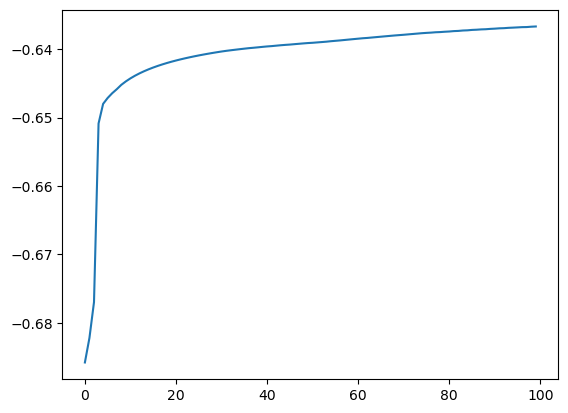

In [188]:
plt.plot(j)

In [189]:
A_ = x_test_.T
Y_ = np.array(test_label)
A, nn = forward_pass(A_,nn)

In [190]:
A

array([[0.30677858, 0.37570221, 0.36370287, 0.30677858, 0.43014969,
        0.30677858, 0.32875493, 0.36132267, 0.30677858, 0.34485674,
        0.32488258, 0.3708832 , 0.30677858, 0.30677858, 0.33103178,
        0.35658276, 0.30677858, 0.38054596, 0.32875493, 0.30677858,
        0.30677858, 0.38785613, 0.30677858, 0.33331657, 0.33461445,
        0.37812105, 0.30677858, 0.32715417, 0.32488258, 0.30677858,
        0.34021776, 0.36608975, 0.43773937, 0.37328956, 0.35422322,
        0.36848323, 0.36370287, 0.30677858, 0.3708832 , 0.30677858,
        0.36608975, 0.45555637, 0.30677858, 0.33103178, 0.32875493,
        0.39275799, 0.37570221, 0.30677858, 0.30677858, 0.34718743]])